## Rock Paper Scissors Classifier

### Import Libraries

In [ ]:
!pip install opendatasets
!pip install pillow
!pip install pandas
!pip install numpy
!pip install tensorflow
!pip install seaborn
!pip install matplotlib

In [17]:
import opendatasets as od
import os
import re
from PIL import Image

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

### Download Dataset

In [2]:
def downloadDataSet():
    url  = "https://www.kaggle.com/datasets/glushko/rock-paper-scissors-dataset/download"
    path = "rock-paper-scissors-dataset"
    
    if os.path.exists(path):
        print("File already downloaded")
    else:
        od.download(url)
        print("File successfully downloaded")

In [3]:
downloadDataSet()

File already downloaded


### Load Dataset

In [4]:
img_height = 150
img_width  = 150
batch_size = 32

def loadDataSet():
    path_train = "rock-paper-scissors-dataset/train"
    path_val   = "rock-paper-scissors-dataset/val"
    path_test  = "rock-paper-scissors-dataset/test"
    return image_dataset_from_directory(path_train, batch_size=batch_size, image_size=(img_height, img_width)), image_dataset_from_directory(path_val, image_size=(img_height, img_width)), image_dataset_from_directory(path_test, image_size=(img_height, img_width))
    

In [5]:
train_DS, val_DS, test_DS = loadDataSet()

Found 1020 files belonging to 3 classes.


2022-05-17 10:45:29.965770: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-17 10:45:39.921883: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 183 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1c:00.0, compute capability: 7.5
2022-05-17 10:45:39.924955: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 183 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1d:00.0, compute capability: 7.5
2022-05-17 10:45:39.926706: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica

Found 804 files belonging to 3 classes.
Found 541 files belonging to 3 classes.


In [6]:
class_names = train_DS.class_names
print(class_names)

['paper', 'rock', 'scissors']


### DataVisualization

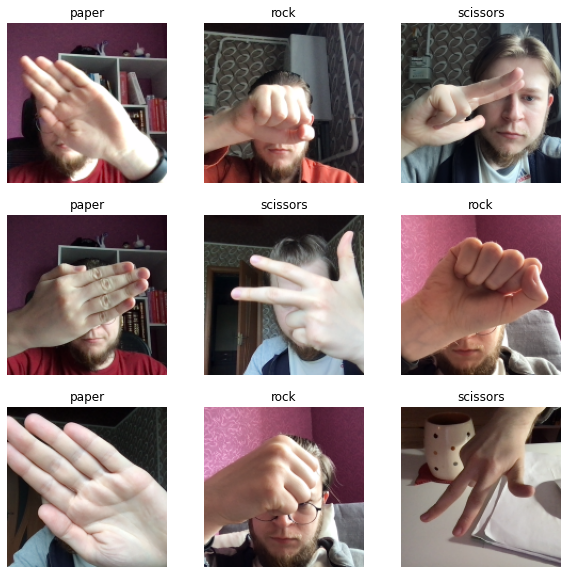

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in train_DS.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
def plotClassDistribution():
    path = "rock-paper-scissors-dataset"
    class_path = {
        'Rock_train'     : len(os.listdir(os.path.join(path, "train/rock"))),
        'Rock_val'       : len(os.listdir(os.path.join(path, "val/rock"))),
        'Paper_train'    : len(os.listdir(os.path.join(path, "train/paper"))),
        'Paper_val'      : len(os.listdir(os.path.join(path, "val/paper"))),
        'Scissors_train' : len(os.listdir(os.path.join(path, "train/scissors"))),
        'Scissors_val'   : len(os.listdir(os.path.join(path, "val/scissors"))),
    }

    keys = list(class_path.keys())
    values = list(class_path.values())

    ax = sns.barplot(x=keys, y=values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

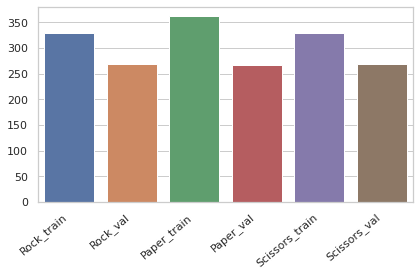

In [26]:
plotClassDistribution()

In [15]:
def plotPieClassDistribution():
    
    
    path = "rock-paper-scissors-dataset"
    class_path = {
        'Rock'     : len(os.listdir(os.path.join(path, "train/rock"))) + len(os.listdir(os.path.join(path, "val/rock"))),
        'Paper'    : len(os.listdir(os.path.join(path, "train/paper"))) + len(os.listdir(os.path.join(path, "val/paper"))),
        'Scissors' : len(os.listdir(os.path.join(path, "train/scissors"))) + len(os.listdir(os.path.join(path, "val/scissors"))),
    }

    keys = list(class_path.keys())
    values = list(class_path.values())
    plt.pie(values,
            explode=(0, 0, 0) , 
            labels=keys,
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.title('Proportion of each observed category')
    plt.show()

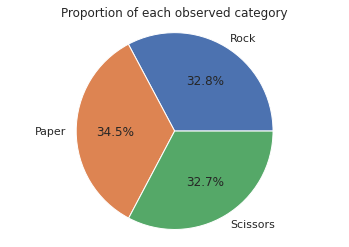

In [27]:
plotPieClassDistribution()

### Modelling

#### Define Model

In [28]:
model_simple = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [29]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

NameError: name 'num_classes' is not defined

In [30]:
model_simple.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

#### Train Modell

In [32]:
AUTOTUNE = tf.data.AUTOTUNE

train_DS = train_DS.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_DS = val_DS.cache().prefetch(buffer_size=AUTOTUNE)

In [33]:
history = model_simple.fit(train_DS, validation_data=val_DS, batch_size=batch_size, epochs=10)

Epoch 1/10


2022-05-17 11:08:15.285838: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 85.56MiB (rounded to 89718784)requested by op sequential/conv2d/Conv2D
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-05-17 11:08:15.285949: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2022-05-17 11:08:15.285976: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 54, Chunks in use: 53. 13.5KiB allocated for chunks. 13.2KiB in use in bin. 1.4KiB client-requested in use in bin.
2022-05-17 11:08:15.285993: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 3, Chunks in use: 3. 1.5KiB allocated for chunks. 1.5KiB in use in bin. 1.5KiB client-requested in use in bin.
2022-05-17 11:08:15

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/conv2d/Conv2D' defined at (most recent call last):
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
      await result
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_752807/3312434129.py", line 1, in <cell line: 1>
      history = model_simple.fit(train_DS, validation_data=val_DS, batch_size=batch_size, epochs=10)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/layers/convolutional.py", line 248, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/wosel@ab.ba.ba-ravensburg.de/miniconda3/envs/Windturbine/lib/python3.9/site-packages/keras/layers/convolutional.py", line 233, in convolution_op
      return tf.nn.convolution(
Node: 'sequential/conv2d/Conv2D'
OOM when allocating tensor with shape[32,32,148,148] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/conv2d/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_860]